# Intro to Computer Vision

* How to load and handle image data using the PIL/Pillow standard Python library
* How to manually standardize and normalize pixel values to prepare images for modeling
(Chapter 5).
* How to load and handle image data directly using the Keras deep learning library
(Chapter 6).
* How to scale pixel values to prepare images for modeling using Keras (Chapter 7).
* How to load large image datasets from directories using Keras (Chapter 8).
* How to use data augmentation to expand the size of an image training dataset

## Images, Pixels,

Pixels are the atomic building blocks of an image. Every image consists of a set of pixels laid out in a gridlike manner. Normally, a pixel is considered the “color” or the “intensity” of light that appears in a given
place in our image (field of view). 
In a grayscale image, each pixel is a scalar value between 0 and 255, where 0 (zero) corresponds
to “black” and 255 to “white”. Values between 0 and 255 are varying shades of gray, where
values closer to 0 are darker and values closer to 255 are lighter.  Color pixels  are normally represented in the RGB color space (other color spaces do exist such as HSV, but are  not relevant here).

Pixels in the RGB color space are no longer a scalar value like in a grayscale/single channel
image – instead, the pixels are represented by a list of three values: one value for the Red component,
one for Green, and another for Blue. Each of the Red, Green, and Blue channels can have values defined in the range [0;255] for a total of 256 “shades” of their respective colors. Given
that the pixel value only needs to be in the range [0;255], we normally use 8-bit unsigned integers
to represent the intensity. Given our three Red, Green, and Blue values, we can combine them into an RGB tuple in the
form (red, green, blue). This tuple represents a given color in the RGB color space. The
RGB color space is an example of an additive color space: the more of each color is added, the
brighter the pixel becomes and closer to white.  RGB color space a bit unintuitive for humans to easily define shades of color without using a “color picker” tool. It doesn’t mimic how humans perceive color. Despite these drawbacks, nearly most images we  work with will be represented in RGB color space.



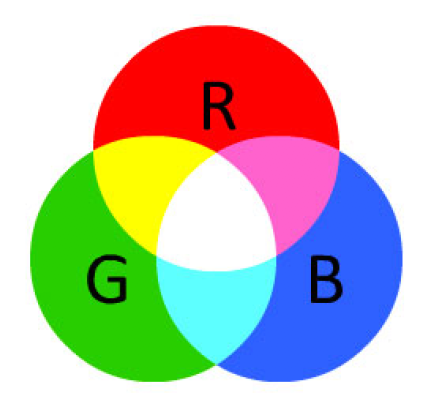

An RGB image is represented by three values, one for each of the Red, Green,
and Blue components, and as such it can be represented three
independent matrices of width W and height H. See below for examples.


### The Image Coordinate System
An image is represented as a grid of pixels. The
origin point (0;0) corresponds to the upper-left corner of the image (largely due to due to matrix notation). As we move down and to the
right, both the x and y values increase.  In python, an image can defined as a 3D NumPy multidimensional arrays with a width, height, and depth. In python images can be naturally represented as a 3D NumPy array  (height, width, depth).  


# Python Pillow library (compatible with Python 3)
Pillow is an updated version of the Python Image Library, or PIL, and supports a range of simple and sophisticated image manipulation functionality. 
* The **Python Imaging Library**, or PIL for short, is an open source library for loading and manipulating images. It was developed and made available more than 25 years ago and has become a de facto standard API for working with images in Python. The library is now defunct and no longer updated and does not support Python 3. 
* **Pillow** is a PIL library that supports Python 3 and is the preferred modern library for image manipulation in Python. It is even required for simple image loading and saving in other Python scientific libraries such as SciPy and Matplotlib.

It is also the basis for simple image support in other Python libraries such as SciPy and Matplotlib. 


This notebook heavily adapts material from the following:
* a great introductory book by Jason Brownlee, published in early 2019, entitled `Deep Learning for computer vision` 

* and from a great tutorial on using Pillow is located [here](https://pillow.readthedocs.io/en/3.0.x/handbook/tutorial.html).


In [1]:
#! pip -q install Pillow

In [2]:
# check PIL and Pillow version numbers
import PIL
print('Pillow Version:', PIL.__version__)   # latest version is Pillow Version: 5.4.1
print('PIL Version:', PIL.VERSION)

Pillow Version: 5.4.1
PIL Version: 1.1.7


## set up wget and unzip

In [3]:
# to install wget, and unzip uncomment the following lines
#
!apt-get -y update
!apt-get -y install build-essential wget cmake unzip

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!wget "https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg" -O duckietown_nice-1024x683.jpg



'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!wget "https://www.dropbox.com/s/uvyfdamvi183kes/opera_house.jpg?dl=0" -O opera_house.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Load an image using Pillow

### Using the Image class
The most important class in the Python Imaging Library is the `Image` class, defined in the module with the same name. You can create instances of this class in several ways; 
* either by loading images from files, 
* processing other images, 
* or creating images from scratch.

To load an image from a file, use the `open()` function in the Image module:

In [6]:
import numpy as np
import pandas as pd

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


The format attribute identifies the source of an image (e.g. JPEG). If the image was not read from a file, it is set to None. The size attribute is a 2-tuple containing width and height (e.g. 640 × 360  pixels in width and height). The mode attribute defines the number and names of the bands in the image, and also the pixel type and depth. Common modes are “L” (luminance) for greyscale images, “RGB” for true color images, and “CMYK” for pre-press images.

The Python Imaging Library uses a Cartesian pixel coordinate system, with (0,0) in the upper left corner. Note that the coordinates refer to the implied pixel corners; the centre of a pixel addressed as (0, 0) actually lies at (0.5, 0.5).

JPEG (640, 360) RGB


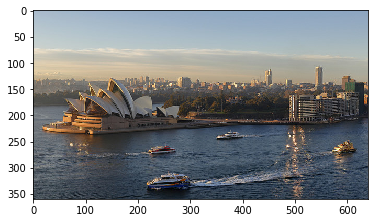

In [8]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('opera_house.jpg')
# summarize some details about the image
print(image.format, image.size, image.mode)
# show the image
#image.show()
plt.imshow(image)

## Useful operations on images
### How to Convert Images to NumPy Arrays and Back

Running the example below loads the image and then reports the data type of the array, in
this case, 8-bit unsigned integers, then reports the shape of the array, in this case, 360 pixels
high by 640 pixels wide and three channels for red, green, and blue.

In [9]:
# load image and convert to and from NumPy array
from PIL import Image
import numpy as np
from numpy import asarray
# load the image
image = Image.open('opera_house.jpg') # JPEG (640, 360) RGB
# convert image to numpy array
data = np.asarray(image)
# summarize shape
print(f"Numpy Array shape {data.shape}")
print(f"Numpy Array dtype {data.dtype}")

# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(f"Pillow image shape {image2.size}")


Numpy Array shape (360, 640, 3)
Numpy Array dtype uint8
None
RGB
Pillow image shape (640, 360)


### `imread()`: load images to array directly
`imread()` function that loads the image as
an array of pixels directly 

In [10]:
from matplotlib import image
img = image.imread('opera_house.jpg')
print(f"Numpy Array shape {img.shape}")
print(f"Numpy Array dtype {img.dtype}")


Numpy Array shape (360, 640, 3)
Numpy Array dtype uint8


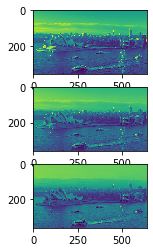

In [11]:
# create flipped versions of an image
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
# load image
img = image.imread('opera_house.jpg') # read as numpy array

#pyplot.imshow(img)

plt.subplot(311) #3 rows, 1 column, first image
plt.imshow(img[:,:,0])
plt.subplot(312)
plt.imshow(img[:,:,1])
plt.subplot(313)
plt.imshow(img[:,:,2])
#pyplot.show()

### load all images in a directory

In [14]:
# load all images in a directory
from os import listdir
from matplotlib import image
# load all images in a directory
loaded_images = list()
for filename in listdir('images'):
    # load imageb
    img_data = image.imread('images/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))


In [15]:
a[:,:,0] *=0
a[:,:,1] *=0


NameError: name 'a' is not defined

### saving an image in another format

In [16]:
# example of saving an image in another format
from PIL import Image
# load the image
image = Image.open('opera_house.jpg')
# save as PNG format
image.save('opera_house.png', format='PNG')
# load the image again and inspect the format
image2 = Image.open('opera_house.png')
print(image2.format)


PNG


### saving a grayscale version of a loaded image

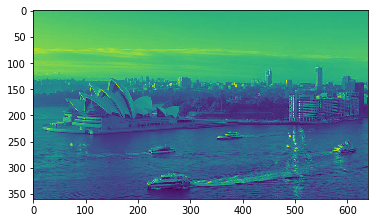

In [17]:
# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open('opera_house.jpg')
# convert the image to grayscale
gs_image = image.convert(mode='L')
# save in jpeg format
gs_image.save('opera_house_grayscale.jpg')
# load the image again and show it
image2 = Image.open('opera_house_grayscale.jpg')
# show the image
#image2.show()
plt.imshow(image2)

### Resize Images: preserve aspect/ratio

It is important to be able to resize images before modeling. Sometimes it is desirable to
thumbnail all images to have the same width or height. This can be achieved with Pillow using
the thumbnail() function. The function takes a tuple with the height and width, and the image
will be resized so that the height and width of the image are equal or smaller than the specified
shape.
For example, the test photograph we have been working with has the width and height of
(640, 360). We can resize it to (100, 100), in which case the largest dimension, in this case, the
width, will be reduced to 100, and the height will be scaled in order to retain the aspect ratio of
the image. The example below will load the photograph and create a smaller thumbnail with a
width and height of 100 pixels.

In this case, the width is reduced to 100 pixels and the height is reduced
to 56 pixels, maintaining the aspect ratio of the original image.

Numpy Array shape (640, 360)
Numpy Array shape (100, 56)


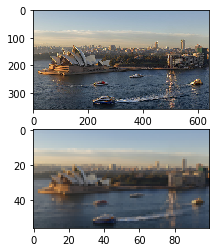

In [18]:
# create a thumbnail of an image
from PIL import Image
from matplotlib import pyplot
# load the image
image = Image.open('opera_house.jpg')
pyplot.subplot(211)
pyplot.imshow(image)
# report the size of the image
print(f"Numpy Array shape {image.size}")
# create a thumbnail and preserve aspect ratio
image.thumbnail((100,100))
# report the size of the modified image
print(f"Numpy Array shape {image.size}")
# show the image
#image.show()
pyplot.subplot(212)
pyplot.imshow(image)



####  Resize Images: do NOT preserve aspect/ratio

The width of the image is squashed to fit in 200 pixels

Numpy Array shape (640, 360)
Numpy Array shape (200, 200)


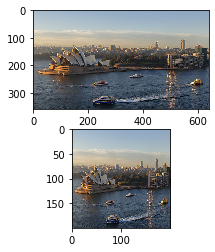

In [19]:
# resize image and force a new shape
from PIL import Image
# load the image
image = Image.open('opera_house.jpg')
# report the size of the image
print(f"Numpy Array shape {image.size}")
# resize image and ignore original aspect ratio
img_resized = image.resize((200,200))
# report the size of the thumbnail
print(f"Numpy Array shape {img_resized.size}")
# show the image
img_resized.show()
plt.imshow(img_resized)

# show the image
# plot original image
pyplot.subplot(211)
pyplot.imshow(image)
# resized
pyplot.subplot(212)
pyplot.imshow(img_resized)
pyplot.show()


### How to Flip, Rotate, and Crop Images

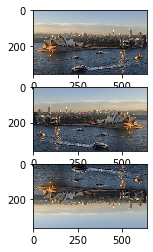

In [20]:
# create flipped versions of an image
from PIL import Image
from matplotlib import pyplot
# load image
image = Image.open('opera_house.jpg')
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
# vertical flip
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)
# plot all three images using matplotlib
pyplot.subplot(311) #3 rows, 1 column, first image
plt.imshow(image)
pyplot.imshow(image)
pyplot.subplot(312)
plt.imshow(hoz_flip)
pyplot.subplot(313)
pyplot.imshow(ver_flip)
#pyplot.show()


#### Rotate an image

Running the example plots the original photograph, then a version of the photograph rotated
45 degrees, and another rotated 90 degrees. You can see that in both rotations, the pixels are
clipped to the original dimensions of the image and that the empty pixels are filled with black
color.

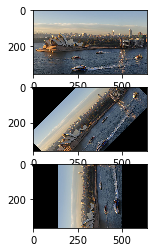

In [21]:
# create rotated versions of an image
from PIL import Image
from matplotlib import pyplot
# load image
image = Image.open('opera_house.jpg')
# plot original image
pyplot.subplot(311)
pyplot.imshow(image)
# rotate 45 degrees
pyplot.subplot(312)
pyplot.imshow(image.rotate(45))
# rotate 90 degrees
pyplot.subplot(313)
pyplot.imshow(image.rotate(90))
pyplot.show()


#### Cropped Image
An image can be cropped: that is, a piece can be cut out to create a new image, using the crop()
function. The crop function takes a tuple argument that defines the two x and y coordinates of
the box to crop out of the image.

Running the example creates a cropped square image of 201 pixels starting at 0,0 and
extending down and left to 200,200.

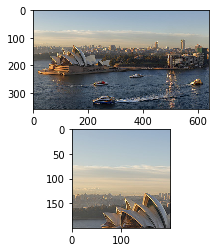

In [22]:
# example of cropping an image
from PIL import Image
# load image
image = Image.open('opera_house.jpg')
# create a cropped image
cropped = image.crop((0, 0, 200, 200)) # crop the top left corner
# show cropped image
cropped.show()
pyplot.subplot(211)
pyplot.imshow(image)
pyplot.subplot(212)
pyplot.imshow(cropped)


## PIAT: Cutting, pasting, and merging images
The Image class contains methods allowing you to manipulate regions within an image. To extract a sub-rectangle from an image, use the `crop()` method.

```
#Copying a subrectangle from an image
box = (100, 100, 400, 400)
region = im.crop(box)
```
The region is defined by a 4-tuple, where coordinates are (left, upper, right, lower). The Python Imaging Library uses a coordinate system with (0, 0) in the upper left corner. Also note that coordinates refer to positions between the pixels, so the region in the above example is exactly 300x300 pixels.

The region could now be processed in a certain manner and pasted back.

```
#Processing a subrectangle, and pasting it back
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)
```

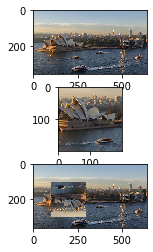

In [23]:
from PIL import Image
# load image
im = Image.open('opera_house.jpg')
# create a cropped image
cropped = image.crop((100, 100, 200, 200)) # crop the top left corner at (100,100) to (200,200)
# show cropped image
pyplot.subplot(311)
pyplot.imshow(im)
#Copying a subrectangle from an image
box = (100, 100, 300, 300)
region = im.crop(box)
pyplot.subplot(312)
pyplot.imshow(region)
#Processing a subrectangle, and pasting it back
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)
pyplot.subplot(313)
pyplot.imshow(im)


# OpenCV

The OpenCV library and provides `cv2.imread()` function  to load
an image from disk.


```
(b, g, r) = image[20, 100] # accesses pixel at x=100, y=20
(b, g, r) = image[75, 25] # accesses pixel at x=25, y=75
(b, g, r) = image[90, 85] # accesses pixel at x=85, y=90
```

In [26]:
!pip3 install opencv-python
#!conda  install -y opencv 

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - opencv-python

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [25]:
import cv2 
IMAGE  = 'opera_house.jpg'
from google.colab.patches import cv2_imshow #PATCH

image = cv2.imread(IMAGE)
print(image.shape)
#cv2.imshow("Image", image) #cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
cv2_imshow(image) #cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
cv2.waitKey(0)

ModuleNotFoundError: No module named 'cv2'

# Scaling image data (for, say, ML purposes)

## Normalize image to [0,1] range

Normalization is a good default data preparation (for any dataset, image or otherwise)that can be performed if you are in doubt
as to the type of data preparation to perform. It can be performed per image and does not
require the calculation of statistics across the training dataset, as the range of pixel values is a
domain standard.

In [ ]:
IMAGE  = 'opera_house.jpg'
# example of pixel normalization
from numpy import asarray
from PIL import Image
# load image
image = Image.open(IMAGE)
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))


# Center Pixel Values: {images} X {channels} --> [0, 1]

A popular data preparation technique for image data is to subtract the mean value from the
pixel values. This approach is called centering, as the distribution of the pixel values is centered
on the value of zero. 

Centering pixel values can be accomplished by a number of ways:

 * {per img, per minibatch, per training set} X {across all channel, per channel}

Centering can be performed before or after normalization. Centering the
pixels then normalizing will mean that the pixel values will be centered close to 0.5 and be in
the range 0-1. Centering after normalization will mean that the pixels will have positive and
negative values, in which case images will not display correctly (e.g. pixels are expected to have
value in the range 0-255 or 0-1). Centering after normalization might be preferred, although it
might be worth testing both approaches.
Centering requires that a mean pixel value be calculated prior to subtracting it from the
pixel values. There are multiple ways that the mean can be calculated; for example:

* Per image.
* Per minibatch of images (under stochastic gradient descent).
* Per training dataset.

The mean can be calculated for all pixels in the image, referred to as a *global centering*, or
it can be calculated for each channel in the case of color images, referred to as *local centering*.
* **Global Centering** : Calculating and subtracting the mean pixel value across color
channels.
* **Local Centering**: Calculating and subtracting the mean pixel value per color channel.

## Global Centering

In [ ]:
from keras.preprocessing.image import img_to_array, array_to_img
# example of global centering (subtract mean)
from numpy import asarray
from PIL import Image
# load image
image = Image.open(IMAGE)
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

# create Pillow image; basically put the image back in the [0, 255] range to render it
global_centered = array_to_img(pixels)
# summarize image details

pyplot.subplot(211)
pyplot.imshow(image)

pyplot.subplot(212)
pyplot.imshow(global_centered)


###  per-channel centering (subtract mean)

In [ ]:
# example of per-channel centering (subtract mean)
from numpy import asarray
from PIL import Image
# load image
image = Image.open(IMAGE)
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate per-channel means and standard deviations
means = pixels.mean(axis=(0,1), dtype='float64')
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
# per-channel centering of pixels
pixels -= means
# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64')
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

# create Pillow image; basically put the image back in the [0, 255] range to render it
global_centered = array_to_img(pixels)
# summarize image details

pyplot.subplot(211)
pyplot.imshow(image)

pyplot.subplot(212)
pyplot.imshow(global_centered)


### global pixel standardization

In [ ]:
# example of global pixel standardization
from numpy import asarray
from PIL import Image
# load image
image = Image.open(IMAGE)
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

# create Pillow image; basically put the image back in the [0, 255] range to render it
global_centered = array_to_img(pixels)
# summarize image details
mean, std = asarray(global_centered).mean(), asarray(global_centered).std()
print('Transformed Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

pyplot.subplot(211)
pyplot.imshow(image)

pyplot.subplot(212)
pyplot.imshow(global_centered)


## Positive Global Standardization
There may be a desire to maintain the pixel values in the positive domain, perhaps so the images
can be visualized or perhaps for the benefit of a chosen activation function in the model. A
popular way of achieving this is to clip the standardized pixel values to the range [-1, 1] and then
rescale the values from [-1,1] to [0,1]. The example below updates the global standardization
example to demonstrate this additional rescaling.

In [ ]:
# example of global pixel standardization shifted to positive domain
from numpy import asarray
from numpy import clip
from PIL import Image
# load image
image = Image.open(IMAGE)
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# clip pixel values to [-1,1]
pixels = clip(pixels, -1.0, 1.0)
# shift from [-1,1] to [0,1] with 0.5 mean
pixels = (pixels + 1.0) / 2.0
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))


# How to Load and Manipulate Images (i.e., Numpy arrays) with Keras
The Keras deep learning library provides a sophisticated API for loading, preparing, and
augmenting image data.
The Keras deep learning library provides utilities for working with image data. The main API
is the ImageDataGenerator class that combines data loading, preparation, and augmentation. This will not be discussed in this section; it will be covered in the next section.

## `load img()` as PIL image
Keras provides the `load img()` function for loading an image from file as a PIL image object.

In [ ]:
# example of loading an image with the Keras API
from keras.preprocessing.image import load_img
# load the image
img = load_img(IMAGE)
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
#img.show()
pyplot.imshow(global_centered)


## How to Convert an Image With Keras from PIL to numpy array

Keras provides the img to array() function for converting a loaded image in PIL format into
a NumPy array for use with deep learning models. The API also provides the array to img()
function that can be used for converting a NumPy array of pixel data into a PIL image. This
can be useful if the pixel data is modified in array format because it can be saved or viewed.

In [ ]:
# example of converting an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
# load the image
img = load_img(IMAGE)
print(type(img))
# convert to numpy array
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
# convert back to image
img_pil = array_to_img(img_array)
print(type(img))


## How to Save an  NumPy_array_based Image With Keras
The Keras API also provides the save img() function to save an image to file. The function
takes the path to save the image, and the **image data in NumPy array format**. 

* The file format is inferred from the filename, but can also be specified via the file format argument. 
  * This can
be useful if you have manipulated image pixel data, such as scaling, and wish to save the image
for later use. 

The example below loads the photograph image in grayscale format, converts it to
a NumPy array, and saves it to a new file name.

In [ ]:
# example of saving an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
# load image as as grayscale
img = load_img(IMAGE, color_mode='grayscale')
# convert image to a numpy array
img_array = img_to_array(img)
# save the image with a new filename
save_img('img.jpg', img_array)
# load the image to confirm it was saved correctly
img = load_img('img.jpg')
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
img.show()


## References

* Jason Brownlee, 2019, Deep Learning for computer vision, Chapter 4.
  * Examples are located [here](https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/)
* [Pillow Homepage](https://python-pillow.org/)
* [Pillow Handbook Tutorial](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)
* [Python Imaging Library, Wikipedia](https://en.wikipedia.org/wiki/Python_Imaging_Library)
* [Matplotlib: Image tutorial](https://matplotlib.org/users/image_tutorial.html)

# Keras Image Augmentation API
Like the rest of Keras, the image augmentation API is simple and powerful.

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

* Sample-wise standardization.
* Feature-wise standardization.
* ZCA whitening.
* Random rotation, shifts, shear and flips.
* Dimension reordering.
* Save augmented images to disk.
* An augmented image generator can be created as follows:

`datagen = ImageDataGenerator()`



Rather than performing the operations on your entire image dataset in memory, the API is designed to be iterated by the deep learning model fitting process, creating augmented image data for you just-in-time. This reduces your memory overhead, but adds some additional time cost during model training.

After you have created and configured your `ImageDataGenerator`, you must fit it on your data. This will calculate any statistics required to actually perform the transforms to your image data. You can do this by calling the `fit()` function on the data generator and pass it your training dataset.

`datagen.fit(train)`

The data generator itself is in fact an iterator, returning batches of image samples when requested. We can configure the batch size and prepare the data generator and get batches of images by calling the flow() function.

`X_batch, y_batch = datagen.flow(train, train, batch_size=32)`

Finally we can make use of the data generator. Instead of calling the `fit()` function on our model, we must call the `fit_generator()` function and pass in the data generator and the desired length of an epoch as well as the total number of epochs on which to train.

`fit_generator(datagen, samples_per_epoch=len(train), epochs=100)`

You can learn more about the Keras image data generator API in the [Keras documentation](http://keras.io/preprocessing/image/).

## MNIST handwritten digit recognition task
We will use the MNIST handwritten digit recognition task in these examples. To begin with, let’s take a look at the first 9 images in the training dataset.

In [ ]:
# Plot images
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

## Random Rotations
Sometimes images in your sample data may have varying and different rotations in the scene.

You can train your model to better handle rotations of images by artificially and randomly rotating images from your dataset during training.

The example below creates random rotations of the MNIST digits up to 90 degrees by setting the rotation_range argument.

In [ ]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## Random Shifts

In [ ]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

## `ImageDataGenerator()`: JIT Scaling of  Image Pixel Data with Keras

The pixel values in images must be scaled prior to providing the images as input to a deep
learning neural network model during the training or evaluation of the model. Traditionally, the
images would have to be scaled prior to the development of the model and stored in memory or
on disk in the scaled format. An alternative approach is to scale the images using a preferred
scaling technique just-in-time during the training or model evaluation process. Keras supports
this type of data preparation for image data via the `ImageDataGenerator` class and API.

In this section we're going to use the MNIST dataset with handwritten digits, digits 0-9.

In [ ]:
# load MNIST data
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
img_rows, img_cols = 28, 28
number_of_classes = 10
print(f"X before flatten train      shape: {X_train.shape}")
print(f"X before flatten validation shape: {X_valid.shape}")
print(f"X before flatten test       shape: {X_test.shape}")

In [ ]:
X_train.shape

In [ ]:
plt.figure(figsize=(12, 5))
for num, i in enumerate(np.random.choice(len(X_train), 10)):
    plt.subplot(2, 5, num + 1)
    plt.imshow(X_train[i], cmap="Greys_r")
    plt.axis("off")
    plt.title(str(y_train[i]))

In [ ]:
# summarize pixel values
print("    MIN MAX          MEAN        STD")
print('Train', X_train.min(), X_train.max(), X_train.mean(), X_train.std())
print('Valid', X_valid.min(), X_valid.max(), X_valid.mean(), X_valid.std())
print('Test ', X_test.min(), X_test.max(), X_test.mean(), X_test.std())


##  ImageDataGenerator pixel scaling techniques
three main types of pixel scaling techniques supported by the ImageDataGenerator class are as
follows:
* Pixel Normalization: scale pixel values to the range 0-1.
* Pixel Centering: scale pixel values to have a zero mean.
* Pixel Standardization: scale pixel values to have a zero mean and unit variance

If the chosen scaling method requires that statistics be calculated across the training
dataset, then these statistics can be calculated and stored by calling the `fit()` function. When
evaluating and selecting a model, it is common to calculate these statistics on the training
dataset and then apply them to the validation and test datasets.

```python
# create data generator
datagen = ImageDataGenerator()
# calculate scaling statistics on the training dataset
datagen.fit(trainX)
```

### flow() iterator for training a NN
Once prepared, the data generator can be used to fit a neural network model by calling the
**`flow()`** function to retrieve an iterator that returns batches of samples and passing it to the
fit `generator()` function.

```python
# get batch iterator
train_iterator = datagen.flow(trainX, trainy)
# fit model
model.fit_generator(train_iterator, ...)
```

If a validation dataset is required, a separate batch iterator can be created from the same
data generator that will perform the same pixel scaling operations and use any required statistics
calculated on the training dataset.

```python
...
# get batch iterator for training
train_iterator = datagen.flow(trainX, trainy)
# get batch iterator for validation
val_iterator = datagen.flow(valX, valy)
# fit model
model.fit_generator(train_iterator, validation_data=val_iterator, ...)
```

### `evaluate_generator()` provides test set batch iterator
Once fit, the model can be evaluated by creating a batch iterator for the test dataset
and calling the `evaluate_generator()` function on the model. Again, the same pixel scaling
operations will be performed and any statistics calculated on the training dataset will be used,
if needed.
```python
...
# get batch iterator for testing
test_iterator = datagen.flow(testX, testy)
# evaluate model loss on test dataset
loss = model.evaluate_generator(test_iterator, ...)
```

###  ImageDataGenerator example for pixel scaling 
The ImageDataGenerator does not need to be fit in this case because there are no global
statistics line mean and standard deviation that need to be calculated. Next, iterators can be
created using the generator for both the train and test datasets. We will use a batch size of 64. This means that each of the train and test datasets of images are divided into groups of 64
images that will then be scaled when returned from the iterator. We can see how many batches
there will be in one epoch, e.g. one pass through the training dataset, by printing the length of
each iterator.

In [ ]:
# example of normalizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

print(f"type of a single training  example {type(trainX[0])}")
print(f"shape of a single training example {trainX[0].shape}")
print(f"number of training examples {trainX.shape[0]}")
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# confirm scale of pixels
print('scale of pixels: Train min=%.3f, max=%.3f' % (trainX.min(), trainX.max()))
print('scale of pixels: Test min=%.3f, max=%.3f' % (testX.min(), testX.max()))

# create generator (1.0/255.0 = 0.003921568627451)
datagen = ImageDataGenerator(rescale=1.0/255.0)
# Note: there is no need to fit the generator in this case
# prepare a iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print("------------------------------------------------")
print("generator that batches ")
print('Number Batches for train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
print(f"len(train_iterator) * 64 #the batch size {len(train_iterator)*64}")
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))



The ImageDataGenerator does not need to be fit on the training dataset as there is nothing
that needs to be calculated, we have provided the scale factor directly. A single batch of
normalized images is retrieved and we can confirm that the min and max pixel values are zero
and one respectively.

## How to Center Images With ImageDataGenerator
Another popular pixel scaling method is to calculate the mean pixel value across the entire
training dataset, then subtract it from each image. This is called centering and has the effect
of centering the distribution of pixel values on zero: that is, the mean pixel value for centered
images will be zero. The ImageDataGenerator class refers to centering that uses the mean
calculated on the training dataset as feature-wise centering. It requires that the statistic is
calculated on the training dataset prior to scaling.

```python
...
# create generator that centers pixel values
datagen = ImageDataGenerator(samplewise_center=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
```

Once the statistic is calculated
on the training dataset, we can confirm the value by accessing and printing it; for example:

```python
# print the mean calculated on the training dataset.
print(datagen.mean)
```


### Example: Center Images With ImageDataGenerator

We can also confirm that the scaling procedure has had the desired effect by calculating the
mean of a batch of images returned from the batch iterator. We would expect the mean to be a
small value close to zero, but not zero because of the small number of images in the batch. For a sample batch for a batch of 64 images the batchX.mean is 1.19677, whicle the it is  -1.9512 for all images

```python
Means train=33.318, test=33.791
Data Generator Mean (for training set only naturally): 33.318
batchX.shape: (64, 28, 28, 1),    batchX.mean 1.1967780590057373
batchX.shape: (60000, 28, 28, 1), batchX.mean -1.9512917788233608e-05
    ```

In [ ]:
# example of centering a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report per-image mean
print('Means train=%.3f, test=%.3f' % (trainX.mean(), testX.mean()))
# create generator that centers pixel values
# STEP 1: create
datagen = ImageDataGenerator(featurewise_center=True)

# calculate the mean on the training dataset
# Step 2: FIT 
datagen.fit(trainX)
print('Data Generator Mean (for training set only naturally): %.3f' % datagen.mean)

# demonstrate effect on a single batch of samples
# Step 3: APPLY mean to batch
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(f"batchX.shape: {batchX.shape},    batchX.mean {batchX.mean()}")

# VERIFY  effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(f"batchX.shape: {batchX.shape}, batchX.mean {batchX.mean()}")


##  Standardize Images With ImageDataGenerator (after centering)
Standardization is a data scaling technique that assumes that the distribution of the data is
Gaussian and shifts the distribution of the data to have a mean of zero and a standard deviation
of one. Data with this distribution is referred to as a standard Gaussian.

It can be beneficial
when training neural networks as the dataset sums to zero and the inputs are small values in
the rough range of about -3.0 to 3.0 (e.g. 99.7 of the values will fall within three standard
deviations of the mean). Standardization of images is achieved by subtracting the mean pixel
value and dividing the result by the standard deviation of the pixel values. 
### Standardize Images feature-wise 
The mean and
standard deviation statistics can be calculated on the training dataset, and as discussed in the
previous section, Keras refers to this as feature-wise.

```python
...
# feature-wise generator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate mean and standard deviation on the training dataset
datagen.fit(trainX)
```

#### Example: Standardize using all training data and apply batchwise
The effect will be batches of images with an approximate mean of zero and a standard deviation
of one. As with the previous section, we can confirm this with some simple experiments.

In [ ]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))


# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())


### Standardize Images sample-wise

The statistics can also be calculated then used to standardize each image separately, and
Keras refers to this as sample-wise standardization.

```python
...
# sample-wise standardization
datagen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)
7.6. How to Standardize Images With ImageDataGenerator 70
# calculate mean and standard deviation on the training dataset
datagen.fit(trainX)
```

# Load Large Datasets From Directories with Keras

There is a standard way to lay out your image data for modeling. After you have collected
your images, you must sort them first by dataset, such as train, test, and validation, and
second by their class. For example, imagine an image classification problem where we wish to
classify photos of cars based on their color, e.g. red cars, blue cars, etc. 

### Directory structure (no more X_train, X_validation)
The contents of the .zip are extracted to the base directory `/tmp/cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets (see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition) for a refresher on training, validation, and test sets), which in turn each contain `cats` and `dogs` subdirectories. **NOTE: we do NOT load the data into memory** in variables like X_train, X_validation any longer since these datasets can be gigabytes to terrabytes in size. 

Let's define each of these directories.

## Laying out data so that we can JIT during training and testing
First, we have a data/
directory where we will store all of the image data. Next, we will have a data/train/ directory
for the training dataset and a data/test/ for the holdout test dataset. We may also have a
data/validation/ for a validation dataset during training.

```
data/
data/train/
data/test/
data/validation/
```

Under each of the dataset directories, we will have subdirectories, one for each class where
the actual image files will be placed. For example, if we have a binary classification task for
classifying photos of cars as either a red car or a blue car, we would have two classes, red and
blue, and therefore two class directories under each dataset directory. For example:

```
data/
data/train/
data/train/red/
data/train/blue/
data/test/
data/test/red/
data/test/blue/
data/validation/
data/validation/red/
data/validation/blue/
```

Images of red cars would then be placed in the appropriate class directory.
For example:

```
data/train/red/car01.jpg
data/train/red/car02.jpg
data/train/red/car03.jpg
...
data/train/blue/car01.jpg
data/train/blue/car02.jpg
data/train/blue/car03.jpg
```

Remember, we are not placing the same files under the red/ and blue/ directories; instead,
there are different photos of red cars and blue cars respectively. Also recall that we require
different photos in the train, test, and validation datasets. The filenames used for the actual
images often do not matter as we will load all images with given file extensions. A good naming
convention, if you have the ability to rename files consistently, is to use some name followed by
a number with zero padding, e.g. image0001.jpg if you have thousands of images for a class.

## Exclude subdirectories (MNIST digits example)
In fact, you can also use this trick to exclude subdirectories of your dataset for whatever reason. Going back to the MNIST problem above, if you only cared about recognizing digits 0 through 3, you could do something like this:

```python
datagen = ImageDataGenerator()
train_data = datagen.flow_from_directory('./train', classes=['0', '1', '2', '3'])
```

## JIT Loading of  Images during training/testing
Now that we have a basic directory structure, let’s practice loading image data from file for
use with modeling.

### Download Data and do some EDA and Prep

Download and unzip the cats and dogs dataset.  We will use Kaggle’s Dogs vs Cats dataset, which contains 25,000 images of cats and dogs.


In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!rm -rf data
!mv kagglecatsanddogs_3367a.zip data


In [ ]:
#%%capture stdout_stderr_log_zip
%%capture 
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip


In [ ]:
#print(stdout_stderr_log_zip)

In [ ]:
%%capture 
!rm -rf data
!mkdir data
!cp kagglecatsanddogs_3367a.zip data
!unzip data/kagglecatsanddogs_3367a.zip -d data
!find PetImages/train/Cat -size  0 -print0 |xargs -0 rm --
!find PetImages/train/Dog -size  0 -print0 |xargs -0 rm --

In [ ]:
!ls data

In [ ]:
print(stdout_stderr_log)

### Split some data for testing and validation.

Having download the data we need to split some data for testing and validation, moving images to the train and test folders. We use the train_test_split() function from scikit-learn to build these two sets of data. Thus, we create a structure with training and testing data, and a directory for each target class. This is the common folder structure to use for training a custom image classifier — with any number of classes — with Keras.

In [ ]:
from glob import glob
from sklearn.model_selection import train_test_split

cats = glob('data/PetImages/Cat/*.jpg')
dogs = glob('data/PetImages/Dog/*.jpg')
print(f"Number of cat examples in original dataset: {len(cats)}")
print(f"Number of dog examples in original dataset: {len(dogs)}")
# To reduce computational overhead
# only use 10% of the dataset for training, validation, and testing
cats, _ = train_test_split(cats, test_size=0.9)
dogs, _ = train_test_split(dogs, test_size=0.9)
print(f"Number of cat examples in downsampled dataset: {len(cats)}")
print(f"Number of dog examples in downsampled dataset: {len(dogs)}")
# train, validation, and blind test datasets
#
cats_train, cats_test = train_test_split(cats, test_size=0.15)
cats_train, cats_valid = train_test_split(cats_train, test_size=0.15)
dogs_train, dogs_test = train_test_split(dogs, test_size=0.15)
dogs_train, dogs_valid = train_test_split(dogs_train, test_size=0.15)

nb_train_samples  = len(cats_train) + len(dogs_train)
nb_valid_samples  = len(cats_valid) + len(dogs_valid)

TRAIN_DIR = 'data/train'
VALID_DIR = 'data/valid'
TEST_DIR = 'data/test'

!rm -rf $TRAIN_DIR
!rm -rf $VALID_DIR
!rm -rf $TEST_DIR

!mkdir $TRAIN_DIR
!mkdir $VALID_DIR
!mkdir $TEST_DIR

!mkdir $TRAIN_DIR/Cat
files = ' '.join(cats_train)
!mv -t $TRAIN_DIR/Cat $files

!mkdir $TRAIN_DIR/Dog
files = ' '.join(dogs_train)
!mv -t $TRAIN_DIR/Dog $files

cats_train_glob = glob('data/train/Cat/*.jpg')
dogs_train_glob = glob('data/train/Dog/*.jpg')


!mkdir $VALID_DIR/Cat
files = ' '.join(cats_valid)
!mv -t $VALID_DIR/Cat $files

!mkdir $VALID_DIR/Dog
files = ' '.join(dogs_valid)
!mv -t $VALID_DIR/Dog $files

!mkdir $TEST_DIR/Cat
files = ' '.join(cats_test)
!mv -t $TEST_DIR/Cat $files

!mkdir $TEST_DIR/Dog
files = ' '.join(dogs_test)
!mv -t $TEST_DIR/Dog $files

In [ ]:
!ls -l data/train

In [ ]:
%%capture stdout_stderr_log
!ls -l data/train/Cat|wc -l
!ls -l data/train/Dog|wc -l
!ls -l data/valid/Cat|wc -l
!ls -l data/valid/Dog|wc -l
!ls -l data/test/Cat|wc -l
!ls -l data/test/Dog|wc -l

In [ ]:
print(stdout_stderr_log)

In [ ]:
ls -l data/train/Cat

In [ ]:
cats

Plot some random images from the dataset. *Notice the height and width of the images vary quite a bit. *

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

cats = np.random.choice(cats_train_glob, 13)
dogs = np.random.choice(dogs_train_glob, 12)
data = np.concatenate((cats, dogs))
labels = 13 * ['Cat'] + 12 *['Dog']

N, R, C = 25, 5, 5
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(f"{label}:HxW:{im.height}x{im.width}")
    plt.imshow(np.asarray(im))
    plt.axis('off')

### ImageDataGenerator will  resize each image to 299x299 by stretching or shrinking
ImageDataGenerator() will  resize each image to 299x299 by stretching or shrinking to meet the target_size.

E.g., the width of this test image is squashed from 500 to 299 pixels. The aspect ratio of the original image is thereby lost. See later subsection in the section for an example.

```python
test_image is data/train/Cat/374.jpg
Numpy Array shape (500, 375)
Numpy Array shape (299, 299)
```

### JIT loading of images via ImageDataGenerator

`ImageDataGenerator()` is a Keras builtin class for walking the directory structure for a dataset, loading image data, and returning the input (pixel arrays) and output (class integer).  The
main benefit of using this class to load the data is that images are loaded for a single dataset in
batches, meaning that it can be used for loading both small datasets as well as very large image
datasets with thousands or millions of images.

`ImageDataGenerator()` loads just enough images into memory for
the current and perhaps the next few mini-batches when training and evaluating a deep learning
model. The dataset is progressively
loaded from file, retrieving just enough data for what is needed immediately. 

Two additional
benefits of the using the ImageDataGenerator class are:
* that it can also automatically scale pixel values of images 
* and it can automatically generate augmented versions of images.

The constructor for the ImageDataGenerator contains
many arguments to specify how to manipulate the image data after it is loaded, including
pixel scaling and data augmentation.

1. We do not need any of these features at this stage, so configuring the ImageDataGenerator is easy.

```python
...
# create a data generator
datagen = ImageDataGenerator()
```

2. Next, an iterator is required to progressively load images for a single dataset. This requires calling the flow from directory() function and specifying the dataset directory, such as the train, test, or validation directory. The function also allows you to configure more details related to the loading of images. Of note is the target size argument that allows you to load all images to a specific size, which is often required when modeling. The function defaults to square images with the size (256, 256).

The `ImageDataGenerator()` function also allows you to specify the type of classification task via the class mode
argument, specifically whether it is `‘binary’` or a multiclass classification `‘categorical’`. The
default batch size is 32, which means that 32 randomly selected images from across the classes
in the dataset will be returned in each batch when training. You may also want to return batches in a deterministic order when evaluating a model,
which you can do by setting `shuffle` to `False`. The subdirectories of images, one for each
class, are loaded by the flow from directory() function in alphabetical order and assigned
an integer for each class. For example, the subdirectory blue comes before red alphabetically,
therefore the class labels are assigned the integers: blue=0, red=1. This can be changed via
the classes argument in calling flow from `directory()` when training the model.


```python
...
# load and iterate training dataset
train_it = datagen.flow_from_directory('data/train/', class_mode='binary', batch_size=64)
# load and iterate validation dataset
val_it = datagen.flow_from_directory('data/validation/', class_mode='binary', batch_size=64)
# load and iterate test dataset
test_it = datagen.flow_from_directory('data/test/', class_mode='binary', batch_size=64)
```

Once the iterators have been prepared, we can use them when fitting and evaluating a deep
learning model. For example, fitting a model with a data generator can be achieved by calling
the fit generator() function on the model and passing the training iterator (train it). The
validation iterator (val it) can be specified when calling this function via the validation data
argument. The steps per epoch argument must be specified for the training iterator in order
to define how many **batches of images defines a single epoch**.
For example, if you have 1,000 images in the training dataset (across all classes) and a batch
size of 64, then the steps per epoch would be about 16, or $\frac{1000}{64}$ . Similarly, if a validation
iterator is applied, then the validation steps argument must also be specified to indicate the
number of batches in the validation dataset defining one epoch.

```python
...
# define model
model = ...
# fit model
model.fit_generator(train_it, steps_per_epoch=16, validation_data=val_it,
validation_steps=8)
```

Finally, if you want to use your fit model for making predictions on a very large dataset, you
can create an iterator for that dataset as well (e.g. `test_it`) and call the predict generator()
function on the model.
```python
...
# make a prediction
yhat = model.predict_generator(test_it, steps=24)
```

# Transfer Learning for, say, image classification

Convolutional neural networks (CNNs) are great at tasks like image classification.
But whenever we train a new convolutional neural network, it has to relearn
how to classify images from scratch—which means that we need a
massive amount of training data and lots of GPUs and wall clock time to make CNNs work well.

An alternative approach to retraining from scratch  is to use **transfer learning**. In transfer learning, you take a
neural network trained on one set of data and use what it has learned to
give it a head start at solving a new (but related problem, at least in similar domain e.g., images of outdoor things and brain images) problem.


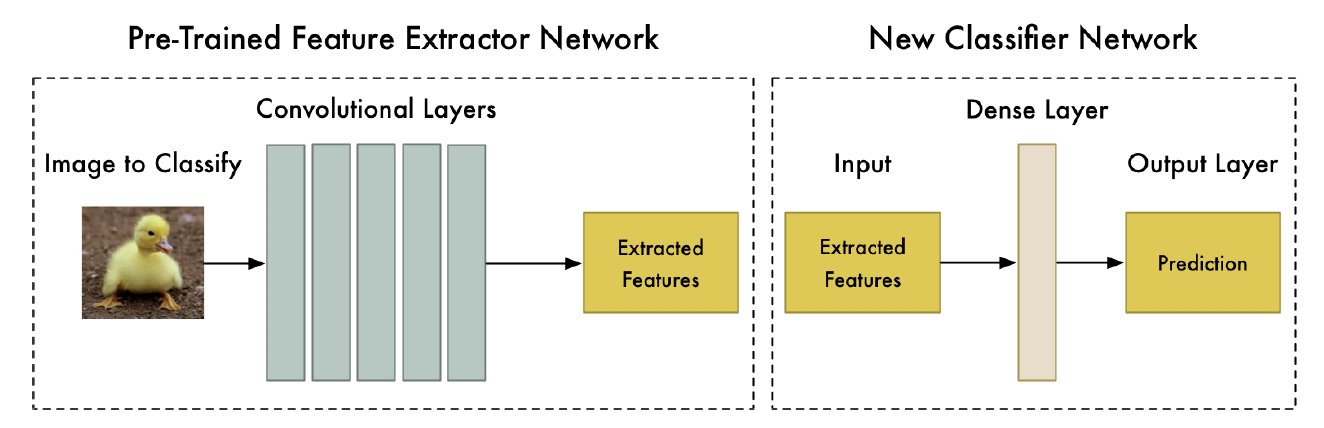

How about we keep the trained convolutional layers that detect patterns,
but we slice off and remove the densely connected layers. The feature extractor is doing the hard work of detecting shapes and patterns.
The classifier network has the much simpler job of classifying those
detected shapes and patterns as “bird” or “not bird” ("cat" or "dog"). When doing transfer learning, we typically "freeze"  the feature extractor network and train the classifier network as usual.
Since the new classifier isn’t doing that much work, it won’t take very
much training data to train it.

To classify a new image, we have to first pass it through the feature extractor
network and save the extracted features. Then we can feed the
extracted features into the classifier network to get a final answer. In Keras, we can easily join these two networks into a single network.

# Casestudy: dogs and cats and InceptionV3 + ImageDataGenerator()


**bold text**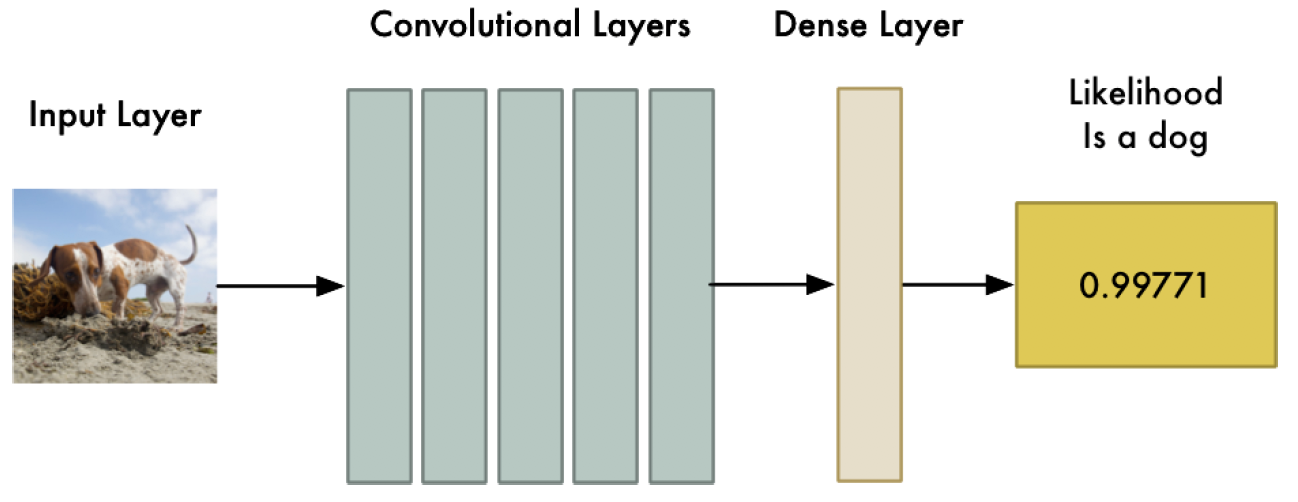



The case study explores doing transfer learning. In Keras transfer learning is relatively easy when based upon the following backbone   models:

* VGG (e.g. in Keras we could use the VGG16 or VGG19 classes).
* GoogLeNet (e.g. InceptionV3).
* Residual Network (e.g. ResNet50).

Here we perform Transfer Learning based on the InceptionV3 architecture and weights.

With 42 layers deep, the computation cost for **Inception V3** is only about 2.5 higher than that of GoogLeNet (**GoogLeNet**, aka *Inception V1*, has 9 such Inception modules stacked linearly. It is 22 layers deep (27, including the pooling layers)), and much more efficient than that of VGGNet (16 layers). InceptionV1 has 7 million and InceptionV3 23 million parameters.  This drops to  21,802,784 parameters for our 2-class model based on the InceptionV3 backbone.


![alt text](https://cdn-images-1.medium.com/max/800/1*gqKM5V-uo2sMFFPDS84yJw.png)

For more background on InceptionV3 see [here](https://medium.com/@sh.tsang/review-inception-v3-1st-runner-up-image-classification-in-ilsvrc-2015-17915421f77c).

For more information on the Keras implementation see [here](https://keras.io/applications/#inceptionv3)


We are going to instantiate the InceptionV3 network from the keras.applications module, but using the flag `include_top=False` to load the model and their weights but leaving out the last fully connected layer, since that is specific to the ImageNet competition. It drops the `final part` of the Inveption V3 network (since `pooling=None` by default).

```python
base_model = InceptionV3(weights='imagenet', include_top=False)
```
Then we add our custom classification layer, preserving the original Inception-v3 architecture but adapting the output to our number of classes. We use a `GlobalAveragePooling2D` preceding the fully-connected Dense layer of 2 outputs.

```python
CLASSES = 2
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
```

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 2
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning; freeze InceptionV3 42 layers
# freeze all the base_model layers and train the last ones. 
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

### Visualize the 42-layer network

This visualizes the architecturs of InceptionV3. It is **HUGE**. Click next section heading in the TOC to skip this visualization

In [ ]:
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Data augmentation

Data augmentation is a common step used for increasing the dataset size and the model generalizability. Essentially, it is the process of artificially increasing the size of a dataset via transformations — rotation, flipping, cropping, stretching, lens correction, etc — .

Keras provides the class `ImageDataGenerator()` for data augmentation. This class can be parametrized to implement several transformations, and our task will be decide which transformations make sense for our data. Images will be directly taken form our defined folder structure using the method **`flow_from_directory()`**.

Preparing our data generators, we need to note the importance of the preprocessing step to adapt the input image data values to the network expected range values. This is set using the **`preprocess_input`** from the keras.applications.inception_v3 module. As noted about in the EDA section, the height and width of the training and validation  images varies quite a bit, plus the InageNet images that were used to train InceptionV3 were preprocessed (centered, normalized, etc.). The preprocess_input() is explained next.

### Advance augmentation
For more background Keras imagedatagenerator normalization at validation and test time see [here](https://theailearner.com/2019/07/06/keras-imagedatagenerator-normalization-at-validation-and-test-time/)

### preprocess_input() explained for pretrained networks

Keras provides a function called preprocess_input() to prepare new input for a pretrained network. In this case InceptionV3 was trained on ImageNet images that were centered, and scaled in a particular way. For more details, see [here](https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py)

preprocess_input() is imported here from `keras.applications.inception_v3 import InceptionV3, preprocess_input` and therefore applies various preprocessing steps to each image (based on the ImageNet training setup using to train InceptionV3).

Here is the signature for preprocess_input():


```python 
def preprocess_input(x, data_format=None, mode='caffe', **kwargs):
    """Preprocesses a tensor or Numpy array encoding a batch of images.
    # Arguments
        x: Input Numpy or symbolic tensor, 3D or 4D.
            The preprocessed data is written over the input data
            if the data types are compatible. To avoid this
            behaviour, `numpy.copy(x)` can be used.
        data_format: Data format of the image tensor/array.
        mode: One of "caffe", "tf" or "torch".
            - caffe: will convert the images from RGB to BGR,
                then will zero-center each color channel with
                respect to the ImageNet dataset,
                without scaling.
            - tf: will scale pixels between -1 and 1,
                sample-wise.
            - torch: will scale pixels between 0 and 1 and then
                will normalize each channel with respect to the
                ImageNet dataset.
    # Returns
        Preprocessed tensor or Numpy array.
```

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

# Images will be directly taken form our defined folder structure using the method flow_from_directory()
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

# Images will be directly taken form our defined folder structure using the method 
# flow_from_directory()
test_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')


Plot some images as results from data augmentation.

In [ ]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

## Begin Transfer learning

Finally, we compile the model selecting the optimizer, the loss function, and the metric. In this case we are going to use a RMSProp optimizer with the default learning rate of `0.001`, and a `categorical_crossentropy` — used in multiclass classification tasks — as loss function.

It is important to note that we have defined three values: EPOCHS, STEPS_PER_EPOCH, and BATCH_SIZE. These values appear because we cannot pass all the data to the computer at once (due to memory limitations). So, to overcome this problem we need to divide the dataset into smaller pieces (mini-batches) and give them to our computer one by one, updating the weights of the neural network at the end of every step (iteration) to fit it to the data given.

We have defined here a typical BATCH_SIZE of 32 images, which is the number of training examples present in a single iteration or step. And 320 STEPS_PER_EPOCH as the number of iterations or batches needed to complete one epoch.

**batch_size** determines the number of samples in each mini batch. Its maximum is the number of all samples, which makes gradient descent accurate, the loss will decrease towards the minimum if the learning rate is small enough, but iterations are slower. Its minimum is 1, resulting in stochastic gradient descent: Fast but the direction of the gradient step is based only on one example, the loss may jump around. batch_size allows to adjust between the two extremes: accurate gradient direction and fast iteration. Also, the maximum value for batch_size may be limited if your model + data set does not fit into the available (GPU) memory.

**steps_per_epoch**:  the number of batch iterations before a training epoch is considered finished. If you have a training set of fixed size you can ignore it but it may be useful if you have a huge data set or if you are generating random data augmentations on the fly, i.e. if your training set has a (generated) infinite size. If you have the time to go through your whole training data set I recommend to skip this parameter.

**validation_steps** similar to steps_per_epoch but on the validation data set instead on the training data. If you have the time to go through your whole validation data set I recommend to skip this parameter.


Learning is an iterative process, and one epoch is when an entire dataset is passed through the neural network. The number of epochs controls weight fitting, from underfitting to optimal to overfitting, and it must be carefully selected and monitored.

In [ ]:

nb_train_samples  = len(cats_train) + len(dogs_train)
nb_valid_samples  = len(cats_valid) + len(dogs_valid)


In [ ]:
EPOCHS = 2
BATCH_SIZE = 32

MODEL_FILE = 'filename.model.h5'

import time
start = time.time()
hist = history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=nb_train_samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=nb_valid_samples // BATCH_SIZE)
end = time.time()
seconds_per_epoch = f"{(end - start)/epochs:.4}"
print(f"seconds_per_epoch: {seconds_per_epoch}")


# Now that we have trained the model and saved it in MODEL_FILE, 
# we can use it to predict the class of an image file — if there is a cat or a dog in an image— . 
# Even after only 5 epochs, the performance of this model is pretty high, with an accuracy over 
# 94% if trained on the entire 25k dataset.
model.save(MODEL_FILE)

In [ ]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  plt.legend(loc="upper right")

  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation Cross Entropy LOSS')
  plt.legend(loc="upper right")
  plt.show()
  
plot_training(history)

### Load a test image and resize (aspect ratio is lost)
The width of the image is squashed from 500 to 299 pixels. The aspect ratio of the original image is thereby lost.

```python
test_image is data/train/Cat/374.jpg
Numpy Array shape (500, 375)
Numpy Array shape (299, 299)
```

In [ ]:
import os
from PIL import Image
from matplotlib import pyplot

train_cats_dir = "data/train/Cat"
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])
fname = train_cat_fnames[10]
test_image = os.path.join(train_cats_dir, fname)
print(f"test_image is {test_image}")

# resize image and force a new shape
img_orig = image.load_img(test_image)
img = image.load_img(test_image, target_size=(HEIGHT, WIDTH))
# report the size of the image
print(f"Numpy Array shape {img_orig.size}")
# resize image and ignore original aspect ratio
img_resized = img_orig.resize((HEIGHT, WIDTH))
# report the size of the resized
print(f"Numpy Array shape {img_resized.size}")
# show the image
# plot original image
pyplot.subplot(311)
pyplot.imshow(img_orig)
# resized
pyplot.subplot(312)
pyplot.imshow(img_resized)
# resized as loading
pyplot.subplot(313)
pyplot.imshow(img)
pyplot.show()


## Test custom model on sample image

Keras provides a function called preprocess_input() to prepare new input for the network. preprocess_input() does a lot of data preprocessing for pretrained networks. In this case InceptionV3 was trained on ImageNet images that were centered, and scaled in a particular way. For more details, see [here](https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py)

preprocess_input() is imported here from `keras.applications.inception_v3 import InceptionV3, preprocess_input` and therefore applies various preprocessing steps to each image (based on the ImageNet training setup using to train InceptionV3).

Here is the signature for preprocess_input():


```python 
def preprocess_input(x, data_format=None, mode='caffe', **kwargs):
    """Preprocesses a tensor or Numpy array encoding a batch of images.
    # Arguments
        x: Input Numpy or symbolic tensor, 3D or 4D.
            The preprocessed data is written over the input data
            if the data types are compatible. To avoid this
            behaviour, `numpy.copy(x)` can be used.
        data_format: Data format of the image tensor/array.
        mode: One of "caffe", "tf" or "torch".
            - caffe: will convert the images from RGB to BGR,
                then will zero-center each color channel with
                respect to the ImageNet dataset,
                without scaling.
            - tf: will scale pixels between -1 and 1,
                sample-wise.
            - torch: will scale pixels between 0 and 1 and then
                will normalize each channel with respect to the
                ImageNet dataset.
    # Returns
        Preprocessed tensor or Numpy array.
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img) #convert to a NumPy array
    x = np.expand_dims(x, axis=0) # create a batch of 1 image by adding a batch axis
    x = preprocess_input(x)  #center, normalize the image
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("cat", "dog")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()
    
model = load_model(MODEL_FILE)
img = image.load_img(test_image, target_size=(HEIGHT, WIDTH))
# predict requires the input test data to be the correct size
# notice how reduced the width more than the height
preds = predict(model, img)

plot_preds(np.asarray(img), preds)
preds

In [ ]:
%time #seconds_per_epoch = 472 #default

# Images will be directly taken form our defined folder structure using the method flow_from_directory()
model = load_model(MODEL_FILE)

def model_evaluate_on_dataset(model, DIR):
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    test_iterator = test_datagen.flow_from_directory(
        DIR,
        target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    # evaluate model loss on test dataset
    loss, acc = model.evaluate_generator(test_iterator, steps = len(test_iterator), verbose=0)
    return(loss, acc*100.0)
print('>loss = %.4f acc = %.3f' % evaluate_dataset(TEST_DIR))  #test dataset

In [ ]:
#seconds_per_epoch = 472 #default


In [ ]:
%time 
#model = load_model(MODEL_FILE)
import pandas as pd
# add the result of this experiment to the log book
epochs = EPOCHS
exp_name = "CNN-InceptionV3_2" # experiment name
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name","epoch (secs)","Epochs","Train CXE Loss", "Train Acc", "Validation CXE Loss", "Validation  Acc",
                    "Test CXE Loss", "Test  Accuracy"])
    
# Add a experiment results to the experiment log
expLog.loc[len(expLog)] = [f"{exp_name}", seconds_per_epoch, epochs] +  list(np.round(np.reshape([model_evaluate_on_dataset(model, TRAIN_DIR), 
                   model_evaluate_on_dataset(model, VALID_DIR),
                   model_evaluate_on_dataset(model, TEST_DIR)], -1), 3))
expLog


## Conclusions
This introduction to transfer learning presents the steps required to adapt a CNN for custom image classification. For simplicity, it focuses on a binary classifier and using  the cats and dogs dataset.